In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import random
import math
from matplotlib import rc
from IPython.display import clear_output
from time import sleep
rc('animation', html='jshtml')

In [2]:
import warnings
warnings.filterwarnings('ignore')

**Creating Particle swarm optimizer and one of it's varient multiple independent swarms  optimizer**

In [3]:
class Particle():
    
    def __init__(self,x0):
        self.position_i = []          # particle position
        self.velocity_i = []          # particle velocity
        self.pos_best_i = []          # best position individual
        self.err_best_i = -1          # best error individual
        self.err_i = -1               # error individual
        
      

        for i in range(0,num_dimensions):
            self.velocity_i.append(random.uniform(-1,1))                         #assigning velocity to particle
            self.position_i.append(x0[i])                                        #assigning position to particle


    # evaluate current fitness
    def evaluate(self,fit_func):
        self.err_i=fit_func(self.position_i)
        
        if optimize == 'min':
            
            if (self.err_i < self.err_best_i) | (self.err_best_i == -1):
                
                self.pos_best_i = self.position_i
                self.err_best_i = self.err_i
        elif optimize == 'max':
            if (self.err_i > self.err_best_i) | (self.err_best_i == -1):
                self.pos_best_i = self.position_i
                self.err_best_i = self.err_i




    # update new particle velocity
    def update_velocity(self,pos_best_g):

        for i in range(0,num_dimensions):
            r1=random.random()
            r2=random.random()

            vel_cognitive = c1_global*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social = c2_global*r2*(pos_best_g[i]-self.position_i[i])
            self.velocity_i[i] = w_global*self.velocity_i[i]+vel_cognitive+vel_social

    # update the particle position based off new velocity updates
    def update_position(self,lb, ub):
        for i in range(0,num_dimensions):
            self.position_i[i] = self.position_i[i]+self.velocity_i[i]

            # adjust maximum position if necessary
            if self.position_i[i] > ub[i]:
                self.position_i[i] = ub[i]

            # adjust minimum position if neseccary
            if self.position_i[i] < lb[i]:
                self.position_i[i] = lb[i]
                
class PSO():
    def __init__(self,fit_func,lb,ub, opt, num_particles = 100 ,maxiter = 100, w = 0.5, c1 = 0.5, c2 = 0.5,ind_swarms = 1,err = 1.e-8, visualise = False, kde = False ):
        
        self.num_particles = num_particles
        self.ub = ub                                                             #lower bound 
        self.lb = lb                                                             #upper bound
        self.visualise = visualise 
        self.ind_swarms = ind_swarms                                             #If ind_swamrs > 1 then the algorithm is called multiple independent swarms algorithm
        self.kde = kde
        self.err = err                                                          #Iterations will stop if average change in value of fitness function over last 10 iterations is less than err. 

               
        global num_dimensions                                                    #declaring num_dimersions as gloabal variable as it is going to be used in particle class
        global c1_global
        global c2_global
        global w_global
        global optimize
        c1_global = c1                                                           #Strength of social factor(urge of moving towards global best position)
        c2_global = c2                                                           #Strength of cognetive factor/nostalgia (urge of moving towards personal best position)
        w_global = w                                                             #Strength of inertia (urge of moving in same direction as before)
        optimize = opt                                                           #minimize or maximize
        

        if not((optimize == 'min') or (optimize == 'max')):
            print('Enter valid argument for opt(min/max)')


        err_best_g_list = []                                                     #List which will store best global error for multiple independent swarms
        pos_best_g_list = []                                                     #List which will store best global position for multiple independent swarms

        for l in range(self.ind_swarms):
            x0 = np.random.uniform(low = lb, high= ub, size = (self.num_particles,len(ub)) )     #Formation of grid in parameter space
            num_dimensions=len(x0[0])
            err_best_g = -1                                                                      # initializing best error for group(Here any random number can be assigned)

            
            # creating the swarm        
            swarm=[]
                    
            for i in range(0,num_particles):
                swarm.append(Particle(x0[i]))

            count = 1
            diff_err_best_g_list = []                                            #This list will store the value of diffrence between current and previous best global error

            for i in range(maxiter):
                               
                previous_err_best_g = err_best_g

                # evaluating fitness function for all the particles
                for j in range(0,num_particles):
                    swarm[j].evaluate(fit_func)

                    # determine if current particle is the best (globally)
                    if optimize == 'min':
                        if (swarm[j].err_i < err_best_g) or (err_best_g == -1):
                            pos_best_g = list(swarm[j].position_i)
                            err_best_g = float(swarm[j].err_i)
                    else:
                        if (swarm[j].err_i > err_best_g) or (err_best_g == -1):
                            pos_best_g = list(swarm[j].position_i)
                            err_best_g = float(swarm[j].err_i)
                        

                
                diff_err_best_g = (previous_err_best_g) - (err_best_g)
                diff_err_best_g_list.append(diff_err_best_g)

                #Creating a scatter plot which can show change in position of all particles and global best position for functions with 2 dimentions/variables after every iteration
                if (self.visualise == True) and (num_dimensions ==2) :
                    
                    m = []                                                      #List of x coordinates of all particles
                    c = []                                                      #List of y coordinates of all particles
                    plt.figure(figsize=(5,350))
                    plt.rcParams["figure.autolayout"] = True
                    
                    for k in range(num_particles):
                        a = swarm[k].position_i[0]
                        b = swarm[k].position_i[1]
                        m.append(a)
                        c.append(b)
                    df = pd.DataFrame(list(zip(m, c)),columns =['m', 'c'])
                    #plt.subplot(maxiter,1,count)
                    plt.title('after ' + str(i+1) + ' iterations')
                    plt.xlim(lb[0],ub[0])
                    plt.ylim(lb[1],ub[1])
                    clear_output()
                    sns.scatterplot(x ='m', y = 'c', data = df)
                    
                    plt.plot([pos_best_g[0]], [pos_best_g[1]], marker="o",  c="r", label = 'Global best position')  #Marking global best position with red dot
                    plt.legend(loc='best')
                    #plt.plot()
                    plt.show()
                    sleep(0.7)
                    
                    count +=1
                    
                elif (self.visualise == True) | (num_dimensions ==3) :
                    
                    x = []                                                      #List of x coordinates of all particles
                    y = []                                                      #List of y coordinates of all particles
                    z = []
                    #plt.figure(figsize=(5,350))
                    plt.rcParams["figure.autolayout"] = True
                    
                    for k in range(num_particles):
                        a = swarm[k].position_i[0]
                        b = swarm[k].position_i[1]
                        c = swarm[k].position_i[2]
                        x.append(a)
                        y.append(b)
                        z.append(c)
                    #df = pd.DataFrame(list(zip(x,y,z)),columns =['x', 'y','z'])
                    #plt.subplot(maxiter,1,count)
                    #plt.title('after ' + str(i+1) + ' iterations')
                    fig = plt.figure()
                    ax = plt.axes(projection = '3d')
                    plt.xlim(lb[0],ub[0])
                    plt.ylim(lb[1],ub[1])
                    ax.set_zlim(lb[2],ub[2])
                    
                    
                    clear_output()
                    plt.title('after ' + str(i+1) + ' iterations')
                    ax.scatter(x,y,z)
                    #sns.scatterplot(x ='m', y = 'c', data = df)
                    
                    plt.plot([pos_best_g[0]], [pos_best_g[1]],[pos_best_g[2]], marker="o",  c="r", label = 'Global best position')  #Marking global best position with red dot
                    plt.legend(loc='best')
                    #plt.plot()
                    plt.show()
                    sleep(0.7)
                    
                    count +=1
                    
                # Update velocities and position of all the particles
                for j in range(0,num_particles):
                    swarm[j].update_velocity(pos_best_g)
                    swarm[j].update_position(lb,ub)
                
                #Stop iterating if average of improvement in err_best_g is less than 10^-8 in last 10 iterations.
                if (len(diff_err_best_g_list) > 10) & (abs(sum(diff_err_best_g_list[-10:])/10) < self.err):
                    
                    break

        
            pos_best_g_list.append(pos_best_g)
            err_best_g_list.append(err_best_g) 

            if ((opt == 'min') or (opt == 'max')) :
                print ('Best position found in swarm '+ str(l+1) + ' is ' + str(pos_best_g))
                print ('Value of fitness function at gloabl best position in swarm ' + str(l+1) +' is ' + str(err_best_g))
                print ('Iterations stopped after ' + str(len(diff_err_best_g_list)) + ' iterations as the average change in the value of fitness function over last 10 iterations was less than ' + str(self.err) )
                print('-'*50)

                if len(ub) == 2:
                    m = []
                    c = []
                    
                    if self.kde == True:
                      df = pd.DataFrame(list(zip(m, c)),columns =['m', 'c'])
                      plt.figure(figsize=(5,5))
                      plt.title('kde plot')
                      sns.kdeplot(x = df.m, y = df.c, shade=True)

                
    
            
        if self.ind_swarms > 1 and opt == 'min':
            print('Best position found among all swarms is ' + str(pos_best_g_list[err_best_g_list.index(min(err_best_g_list))]))
            print('Value of fitness function at gloabl best position among all swarms is ' + str(min(err_best_g_list)))

        elif self.ind_swarms > 1 and opt == 'min':
            print('Best position found among all swarms is ' + str(pos_best_g_list[err_best_g_list.index(max(err_best_g_list))]))
            print('Value of fitness function at gloabl best position among all swarms is ' + str(max(err_best_g_list)))

In [4]:
def f5(x):
    return ((x[0]**2) + (x[1]**2) + (x[2]**2))

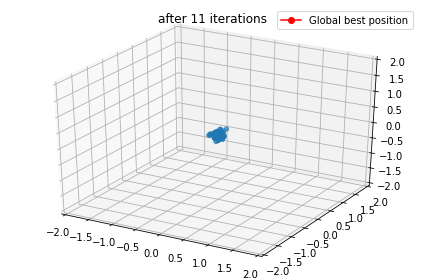

Best position found in swarm 1 is [0.020296135337963706, 0.004713053353010536, 0.007010519597728117]
Value of fitness function at gloabl best position in swarm 1 is 0.0004832933665953929
Iterations stopped after 11 iterations as the average change in the value of fitness function over last 10 iterations was less than 0.1
--------------------------------------------------


In [5]:
lb = [-2,-2,-2]
ub = [2,2,2]
PSO(f5,lb,ub ,opt = 'min',ind_swarms =1,visualise = True,err = 10**-1)

**Finding slope and intercept of given noisy data using PSO**

In [ ]:
slope = 3                                           #Slope of line
intersect = 0                                       #Intersection of line
n = np.random.normal(0,3, 100)                     #Gaussian noise with 0 mean and 1 std dev.
x = np.linspace(0,10,100)                         
y = slope*x + intersect + n

Text(0, 0.5, 'y-axis')

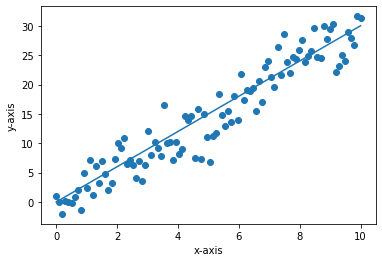

In [ ]:
plt.scatter(x, y)                                    #Scatter plot of noisy data
plt.plot(x, (slope*x) + intersect)                   #Plotting y = 3x line
plt.xlabel('x-axis')
plt.ylabel('y-axis')

In [ ]:
x = np.asarray(x)                                                  #Converting lists to array
y = np.asarray(y)
def func(x,y):
    x2_sum = np.sum(x*x)                                           #Sum of square of each element in x
    y2_sum = np.sum(y*y)                                           #Sum of square of each element in y
    x_sum  = np.sum(x)                                             #Sum of all elements of x
    y_sum  = np.sum(y)                                             #Sum of all elements of y
    xy_sum = np.sum(x*y)                                           #Sum of multiplication of each element of x and y
    return x2_sum,y2_sum,x_sum,y_sum,xy_sum

In [ ]:
x2_sum,y2_sum,x_sum,y_sum,xy_sum = func(x,y)

In [ ]:
print('Value of x2_sum is : ' + str(x2_sum))
print('Value of y2_sum is : ' + str(y2_sum))
print('Value of x_sum is  : ' + str(x_sum))
print('Value of y_sum is  : ' + str(y_sum))
print('Value of xy_sum is : ' + str(xy_sum))

Value of x2_sum is : 3350.16835016835
Value of y2_sum is : 29757.417715425363
Value of x_sum is  : 500.0
Value of y_sum is  : 1450.6847797612618
Value of xy_sum is : 9846.47463304963


In [ ]:
def func1(x):
    
    total_error = (x[0]**2)*(x2_sum)  +  2*x[0]*x[1]*(x_sum)  +  100*x[1]**2  -  2*x[0]*(xy_sum)  -  2*x[1]*(y_sum)  +y2_sum        #error function to be minimized for least square method
    return (total_error)

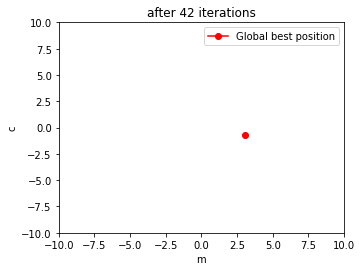

Best position found in swarm 1 is [3.050043982066922, -0.7433726732002294]
Value of fitness function at gloabl best position in swarm 1 is 803.6360100389029
Iterations stopped after 42 iterations
--------------------------------------------------


In [ ]:
lb = [-10,-10]
ub = [10,10]
PSO(func1,lb,ub ,opt = 'min',ind_swarms =1,visualise = True)

In [ ]:
def func2(x):
    return np.sin(x)

**Multiple independent swarm algorithm**

Multiple independent swarm algorithm is one of many variants of PSO.

1)It can be used for finding local and global maximums and minimums for given function. 

2) In standard PSO there are chances of swarm getting trapped in local minima/maxima.Multiple independent swarm algorithm is helpful in finding best/global optimums among all optimums.

In [ ]:
def func3(x):
    return ((np.cos(2*np.pi*x[0]))/x[0])

In [ ]:
x = np.arange(0.1,2.80,0.02)
y = func3([x])

Text(0, 0.5, 'y')

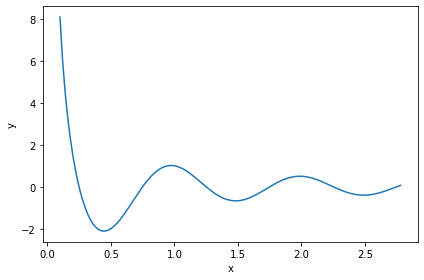

In [ ]:
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')

In [ ]:
lb = [0.1]
ub = [3.0]

In [ ]:
PSO(func3,lb,ub ,opt = 'max',num_particles = 10,ind_swarms=5)

Best position found in swarm 1 is [0.1]
Value of fitness function at gloabl best position in swarm 1 is 8.090169943749475
Iterations stopped after 14 iterations
--------------------------------------------------
Best position found in swarm 2 is [0.9742235410766806]
Value of fitness function at gloabl best position in swarm 2 is 1.0130256160986841
Iterations stopped after 30 iterations
--------------------------------------------------
Best position found in swarm 3 is [0.9745856714187643]
Value of fitness function at gloabl best position in swarm 3 is 1.013023048443972
Iterations stopped after 17 iterations
--------------------------------------------------
Best position found in swarm 4 is [0.1]
Value of fitness function at gloabl best position in swarm 4 is 8.090169943749475
Iterations stopped after 13 iterations
--------------------------------------------------
Best position found in swarm 5 is [0.9742336355450287]
Value of fitness function at gloabl best position in swarm 5 is 1.

Here we have found 2 out of 3  maximums in given range.

In [ ]:
PSO(func3,lb,ub ,opt = 'min',num_particles = 10,ind_swarms=5)

Best position found in swarm 1 is [0.4453764830153736]
Value of fitness function at gloabl best position in swarm 1 is -2.1143447409139497
Iterations stopped after 29 iterations
--------------------------------------------------
Best position found in swarm 2 is [0.4453743789286157]
Value of fitness function at gloabl best position in swarm 2 is -2.1143447406433213
Iterations stopped after 31 iterations
--------------------------------------------------
Best position found in swarm 3 is [0.44537779410329065]
Value of fitness function at gloabl best position in swarm 3 is -2.1143447408957075
Iterations stopped after 32 iterations
--------------------------------------------------
Best position found in swarm 4 is [0.4453774473063996]
Value of fitness function at gloabl best position in swarm 4 is -2.1143447409144898
Iterations stopped after 32 iterations
--------------------------------------------------
Best position found in swarm 5 is [1.4829846744339896]
Value of fitness function at

Here we have found 2 out of 3 minimums in given range

In [ ]:
import sys
!{sys.executable} -m pip install pycbc ligo-common --no-cache-dir

     |████████████████████████████████| 6.7 MB 8.1 MB/s 
     |████████████████████████████████| 78 kB 66.3 MB/s 
     |████████████████████████████████| 51 kB 62.5 MB/s 
     |████████████████████████████████| 46.3 MB 47.9 MB/s 
     |████████████████████████████████| 45 kB 46.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 7.3 MB 35.0 MB/s 
     |████████████████████████████████| 1.4 MB 45.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 201 kB 64.2 MB/s 
     |████████████████████████████████| 55 kB 39.3 MB/s 
     |████████████████████████████████| 295 kB 57.1 MB/s 
     |████████████████████████████████| 43 kB 24.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadat

In [ ]:
import pycbc
from pycbc.catalog import Merger
from pycbc.waveform import get_td_waveform
from pycbc.filter import resample_to_delta_t, highpass
from pycbc.psd import interpolate, inverse_spectrum_truncation
from pycbc.filter import matched_filter
import numpy

In [ ]:
def snr(m):
    merger = Merger("GW150914")

    # Get the data from the Hanford detector
    strain = merger.strain('H1')

    # Remove the low frequency content and downsample the data to 2048Hz
    strain = resample_to_delta_t(highpass(strain, 15.0), 1.0/2048)
    conditioned = strain.crop(2, 2)

    psd = conditioned.psd(4)


    psd = conditioned.psd(4)
    
    psd = interpolate(psd, conditioned.delta_f)

    psd = inverse_spectrum_truncation(psd, int(4 * conditioned.sample_rate),low_frequency_cutoff=15)

    hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                     mass1=m[0],
                     mass2=m[1],
                     delta_t=conditioned.delta_t,
                     f_lower=20)
    hp.resize(len(conditioned))
    
    template = hp.cyclic_time_shift(hp.start_time)
    snr = matched_filter(template, conditioned,
                     psd=psd, low_frequency_cutoff=20)
    snr = snr.crop(4 + 4, 4)

    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]

    return snrp

In [ ]:
from pycbc import catalog
m = catalog.Merger('GW150914')
source_mchirp = m.median1d('mchirp')
redshift = m.median1d('redshift')
det_mchirp = source_mchirp * (1 + redshift)

print('Chirp Mass of GW150914')
print('Source Frame: {} Solar Masses'.format(source_mchirp))
print('Detector Frame: {} Solar Masses'.format(det_mchirp))

Chirp Mass of GW150914
Source Frame: 28.6 Solar Masses
Detector Frame: 31.174000000000003 Solar Masses


In [ ]:
lb = [17,17]
ub = [47,47]
PSO(snr,lb,ub ,opt = 'max')

Best position found in swarm 1 is [41.47815358718177, 32.5699359174971]
Value of fitness function at gloabl best position in swarm 1 is 19.537791418443906
Iterations stopped after 33 iterations
--------------------------------------------------


We are getting values of mass1 and mass to be around 41.47 and 32.56 Solar Masses respectively.

Now we will cleate a template with m1 and m2 equal to 41.47 and 32.56 Solar Masses and compare it with real data

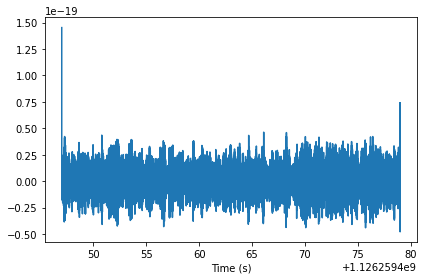

In [ ]:
#Real data
from pycbc.catalog import Merger
from pycbc.filter import resample_to_delta_t, highpass
import pylab

merger = Merger("GW150914")                      

# Get the data from the Hanford detector
strain = merger.strain('H1')

# Remove the low frequency content and downsample the data to 2048Hz
strain = resample_to_delta_t(highpass(strain, 15.0), 1.0/2048)

pylab.plot(strain.sample_times, strain)
pylab.xlabel('Time (s)')
pylab.show()

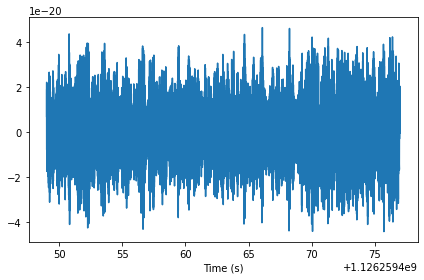

In [ ]:
conditioned = strain.crop(2, 2)

pylab.plot(conditioned.sample_times, conditioned)
pylab.xlabel('Time (s)')
pylab.show()

(30, 1024)

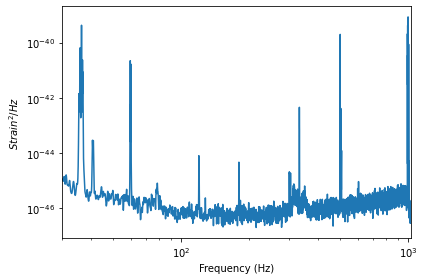

In [ ]:
from pycbc.psd import interpolate, inverse_spectrum_truncation
# Estimate the power spectral density

# We use 4 second samles of our time series in Welch method.
psd = conditioned.psd(4)

# Now that we have the psd we need to interpolate it to match our data
# and then limit the filter length of 1 / PSD. After this, we can
# directly use this PSD to filter the data in a controlled manner

psd = interpolate(psd, conditioned.delta_f)

# 1/PSD will now act as a filter with an effective length of 4 seconds
# Since the data has been highpassed above 15 Hz, and will have low values
# below this we need to informat the function to not include frequencies
# below this frequency. 
psd = inverse_spectrum_truncation(psd, int(4 * conditioned.sample_rate),
                                  low_frequency_cutoff=15)

pylab.loglog(psd.sample_frequencies, psd)
pylab.ylabel('$Strain^2 / Hz$')
pylab.xlabel('Frequency (Hz)')
pylab.xlim(30, 1024)

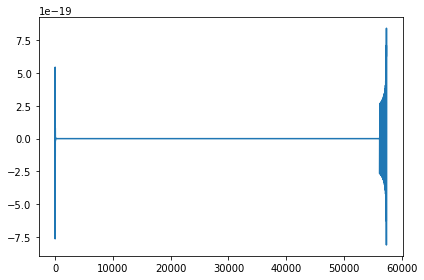

In [ ]:
from pycbc.waveform import get_td_waveform
hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                     mass1=41.47815358718177,
                     mass2=32.5699359174971,
                     delta_t=conditioned.delta_t,
                     f_lower=20)

# We will resize the vector to match our data
hp.resize(len(conditioned))

# The waveform begins at the start of the vector, so if we want the
# SNR time series to correspond to the approximate merger location
# we need to shift the data so that the merger is approximately at the 
# first bin of the data.

# This function rotates the vector by a fixed amount of time.
# It treats the data as if it were on a ring. Note that
# time stamps are *not* in general affected, but the true
# position in the vector is.
#
# By convention waveforms returned from `get_td_waveform` have their
# merger stamped with time zero, so we can use the start time to 
# shift the merger into position
template = hp.cyclic_time_shift(hp.start_time)
pylab.plot(template)
pylab.show()

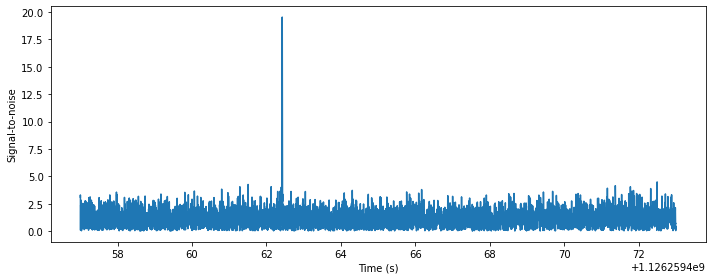

We found a signal at 1126259462.4243164s with SNR 19.540874318578314


In [ ]:
from pycbc.filter import matched_filter
import numpy

snr = matched_filter(template, conditioned,
                     psd=psd, low_frequency_cutoff=20)

# Remove time corrupted by the template filter and the psd filter
# We remove 4 seonds at the beginning and end for the PSD filtering
# And we remove 4 additional seconds at the beginning to account for
# the template length (this is somewhat generous for 
# so short a template). A longer signal such as from a BNS, would 
# require much more padding at the beginning of the vector.
snr = snr.crop(4 + 4, 4)

# Why am I taking an abs() here?
# The `matched_filter` function actually returns a 'complex' SNR.
# What that means is that the real portion correponds to the SNR
# associated with directly filtering the template with the data.
# The imaginary portion corresponds to filtering with a template that
# is 90 degrees out of phase. Since the phase of a signal may be 
# anything, we choose to maximize over the phase of the signal.
pylab.figure(figsize=[10, 4])
pylab.plot(snr.sample_times, abs(snr))
pylab.ylabel('Signal-to-noise')
pylab.xlabel('Time (s)')
pylab.show()

peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]

print("We found a signal at {}s with SNR {}".format(time, 
                                                    abs(snrp)))

In [ ]:
from pycbc.filter import sigma
# The time, amplitude, and phase of the SNR peak tell us how to align
# our proposed signal with the data.

# Shift the template to the peak time
dt = time - conditioned.start_time
aligned = template.cyclic_time_shift(dt)

# scale the template so that it would have SNR 1 in this data
aligned /= sigma(aligned, psd=psd, low_frequency_cutoff=20.0)

# Scale the template amplitude and phase to the peak value
aligned = (aligned.to_frequencyseries() * snrp).to_timeseries()
aligned.start_time = conditioned.start_time

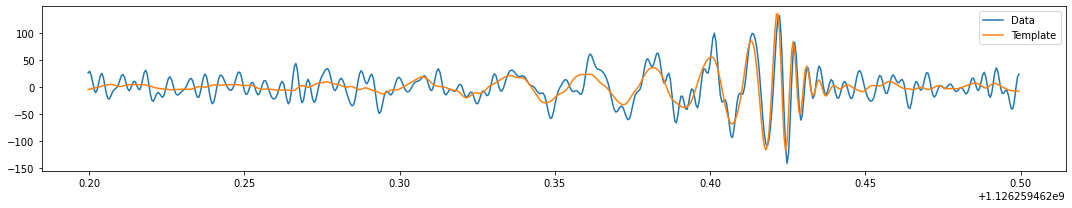

In [ ]:
# We do it this way so that we can whiten both the template and the data
white_data = (conditioned.to_frequencyseries() / psd**0.5).to_timeseries()

# apply a smoothing of the turnon of the template to avoid a transient
# from the sharp turn on in the waveform.
tapered = aligned.highpass_fir(30, 512, remove_corrupted=False)
white_template = (tapered.to_frequencyseries() / psd**0.5).to_timeseries()

white_data = white_data.highpass_fir(30., 512).lowpass_fir(300, 512)
white_template = white_template.highpass_fir(30, 512).lowpass_fir(300, 512)

# Select the time around the merger
white_data = white_data.time_slice(merger.time-.2, merger.time+.1)
white_template = white_template.time_slice(merger.time-.2, merger.time+.1)

pylab.figure(figsize=[15, 3])
pylab.plot(white_data.sample_times, white_data, label="Data")
pylab.plot(white_template.sample_times, white_template, label="Template")
pylab.legend()
pylab.show()

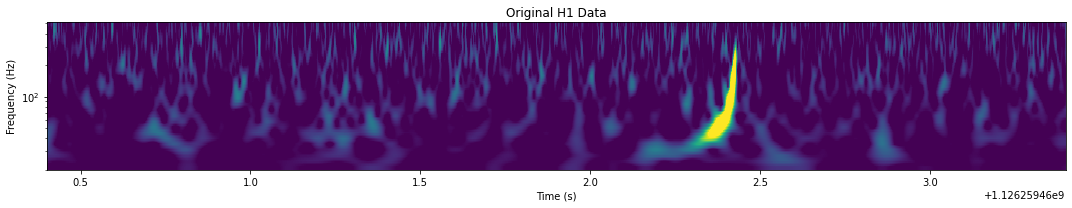

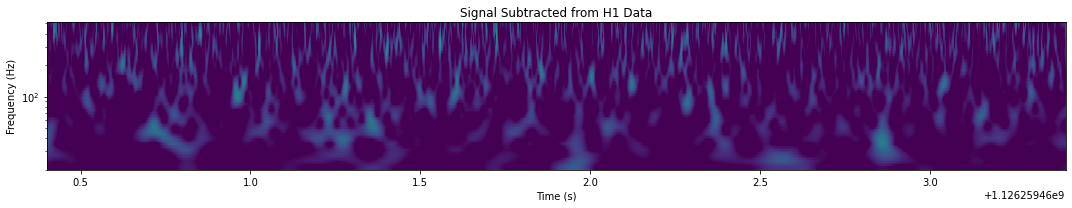

In [ ]:
subtracted = conditioned - aligned

# Plot the original data and the subtracted signal data

for data, title in [(conditioned, 'Original H1 Data'),
                    (subtracted, 'Signal Subtracted from H1 Data')]:

    t, f, p = data.whiten(4, 4).qtransform(.001,
                                                  logfsteps=100,
                                                  qrange=(8, 8),
                                                  frange=(20, 512))
    pylab.figure(figsize=[15, 3])
    pylab.title(title)
    pylab.pcolormesh(t, f, p**0.5, vmin=1, vmax=6)
    pylab.yscale('log')
    pylab.xlabel('Time (s)')
    pylab.ylabel('Frequency (Hz)')
    pylab.xlim(merger.time - 2, merger.time + 1)
    pylab.show()